In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
air = pd.read_excel("C:\\Users\\kanis\\Documents\\New folder\\Forecasting\\Airlines+Data.xlsx")
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


<AxesSubplot:>

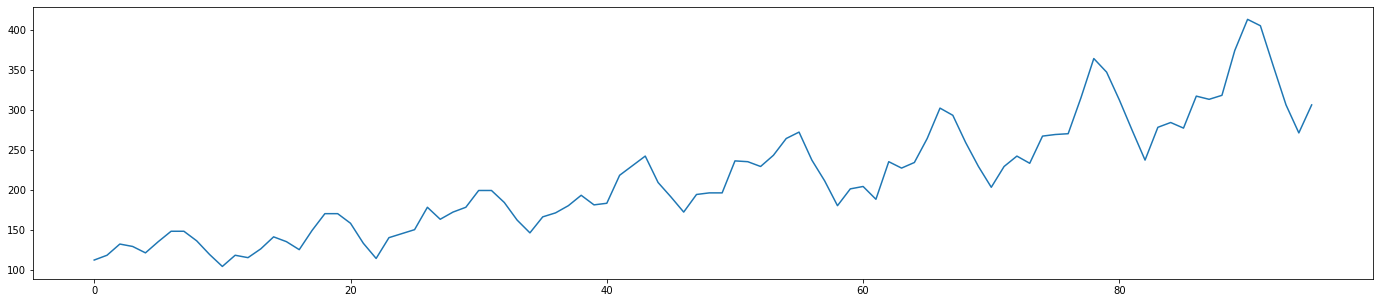

In [4]:
plt.figure(figsize=(24,5))
air.Passengers.plot()

In [6]:
Train = air.head(84)
Test = air.tail(12)

##moving average

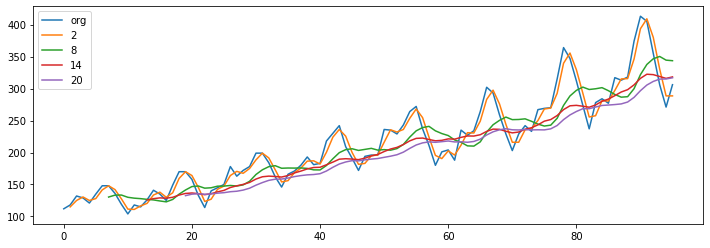

In [7]:
plt.figure(figsize=(12,4))
air.Passengers.plot(label="org")
for i in range(2,24,6):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

##Time series decomposition plot

<ipython-input-9-ba7f811e8d49>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(air.Passengers,freq=12)


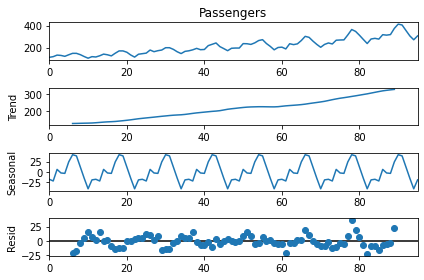

In [9]:
decompose_ts_add = seasonal_decompose(air.Passengers,freq=12)
decompose_ts_add.plot()
plt.show()

##ACF plots and PACF plots

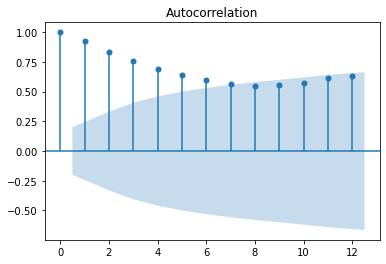

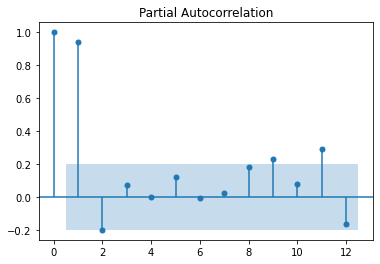

In [11]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=12)
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

##Evaluation Metric MAPE

In [12]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

##Simple Exponential Method

In [13]:
ses_model = SimpleExpSmoothing(Train.Passengers).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

C:\Users\public\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.411274740513823

##Holt method

In [14]:
# Holt method 
hw_model = Holt(Train.Passengers).fit(smoothing_level=0.5, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

<ipython-input-14-920268d80d05>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train.Passengers).fit(smoothing_level=0.5, smoothing_slope=0.2)


23.494677034614366

##Holts winter exponential smoothing with additive seasonality and additive trend

In [15]:
hwe_model_add_add = ExponentialSmoothing(Train.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.495938663841666

##Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [16]:
hwe_model_mul_add = ExponentialSmoothing(Train.Passengers,seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.821237608921072

##Final Model by combining train and test

In [18]:
hwe_model_add_add = ExponentialSmoothing(air.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit()

In [19]:
hwe_model_add_add.forecast(10)

96     319.235284
97     311.528413
98     350.278738
99     346.985064
100    351.845130
101    403.925766
102    440.566807
103    427.446405
104    376.628081
105    329.767444
dtype: float64